### Proyecto 5. Análisis estadístico 

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('C:/Users/irvg/Documents/Valeria/data/train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [6]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [8]:
df_clean = df.copy()

In [9]:
df_clean 

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,Gas

### Realice una copia para limpiar la base de datos

In [10]:
columns = df_clean.columns.to_list()
print(columns)

['id', 'mssubclass', 'mszoning', 'lotfrontage', 'lotarea', 'street', 'alley', 'lotshape', 'landcontour', 'utilities', 'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2', 'bldgtype', 'housestyle', 'overallqual', 'overallcond', 'yearbuilt', 'yearremodadd', 'roofstyle', 'roofmatl', 'exterior1st', 'exterior2nd', 'masvnrtype', 'masvnrarea', 'exterqual', 'extercond', 'foundation', 'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfinsf1', 'bsmtfintype2', 'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'heating', 'heatingqc', 'centralair', 'electrical', '1stflrsf', '2ndflrsf', 'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath', 'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'kitchenqual', 'totrmsabvgrd', 'functional', 'fireplaces', 'fireplacequ', 'garagetype', 'garageyrblt', 'garagefinish', 'garagecars', 'garagearea', 'garagequal', 'garagecond', 'paveddrive', 'wooddecksf', 'openporchsf', 'enclosedporch', '3ssnporch', 'screenporch', 'poolarea', 'poolqc'

In [11]:
for columna in columns:
    print(columna)
    print(df_clean[columna].value_counts())
    print('-----'*10)
    print()

id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: id, Length: 1460, dtype: int64
--------------------------------------------------

mssubclass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: mssubclass, dtype: int64
--------------------------------------------------

mszoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: mszoning, dtype: int64
--------------------------------------------------

lotfrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: lotfrontage, Length: 110, dtype: int64
--------------------------------------------------

lotarea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
1

864     22
1040    14
894     11
1456    10
848     10
        ..
2296     1
1123     1
1199     1
1473     1
1256     1
Name: grlivarea, Length: 861, dtype: int64
--------------------------------------------------

bsmtfullbath
0    856
1    588
2     15
3      1
Name: bsmtfullbath, dtype: int64
--------------------------------------------------

bsmthalfbath
0    1378
1      80
2       2
Name: bsmthalfbath, dtype: int64
--------------------------------------------------

fullbath
2    768
1    650
3     33
0      9
Name: fullbath, dtype: int64
--------------------------------------------------

halfbath
0    913
1    535
2     12
Name: halfbath, dtype: int64
--------------------------------------------------

bedroomabvgr
3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: bedroomabvgr, dtype: int64
--------------------------------------------------

kitchenabvgr
1    1392
2      65
3       2
0       1
Name: kitchenabvgr, dtype: int64
-----------------------

In [12]:
null = df_clean.isnull().sum()
null

id                 0
mssubclass         0
mszoning           0
lotfrontage      259
lotarea            0
                ... 
mosold             0
yrsold             0
saletype           0
salecondition      0
saleprice          0
Length: 81, dtype: int64

In [13]:
null[null > 0]

lotfrontage      259
alley           1369
masvnrtype         8
masvnrarea         8
bsmtqual          37
bsmtcond          37
bsmtexposure      38
bsmtfintype1      37
bsmtfintype2      38
electrical         1
fireplacequ      690
garagetype        81
garageyrblt       81
garagefinish      81
garagequal        81
garagecond        81
poolqc          1453
fence           1179
miscfeature     1406
dtype: int64

In [14]:
null_cols = df_clean.isnull().mean()
null_cols = null_cols[null_cols > 0].sort_values() * 100
null_cols

electrical       0.068493
masvnrtype       0.547945
masvnrarea       0.547945
bsmtqual         2.534247
bsmtcond         2.534247
bsmtfintype1     2.534247
bsmtexposure     2.602740
bsmtfintype2     2.602740
garagecond       5.547945
garagequal       5.547945
garagefinish     5.547945
garagetype       5.547945
garageyrblt      5.547945
lotfrontage     17.739726
fireplacequ     47.260274
fence           80.753425
alley           93.767123
miscfeature     96.301370
poolqc          99.520548
dtype: float64

### Revisando los datos, se puede observar que la mayoria de las propiedades no tienen alberca porque esa variable poolqc se refiere a la calidad de las albercas; por otra parte la variable miscfeature se refiere a otras caracteristicas que tengan las casas, por lo tanto como muy pocas las casas que presentan estas caracteristicas. La variable alley, se refiere al tipo de callejon de acceso a la propiedad, asi que en la mayoria no cuenta con este tipo de acceso y por ultimo la mayoria de las propiedades no tienen cerca: por lo tanto, elimare estas columnas. 

In [15]:
cols_to_eliminate =  list(null_cols[null_cols >= 80].index)
cols_to_eliminate

['fence', 'alley', 'miscfeature', 'poolqc']

In [16]:
data_clean = df_clean.drop(cols_to_eliminate, axis=1)

In [17]:
data_clean

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,NaN,Attchd,1950.0,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


In [18]:
null_displ = data_clean[data_clean['fireplacequ'].isnull() == True]
null_displ.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
5,6,50,RL,85.0,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,700,10,2009,WD,Normal,143000
10,11,20,RL,70.0,11200,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1965,1965,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,906,Unf,0,134,1040,GasA,Ex,Y,SBrkr,1040,0,0,1040,1,0,1,0,3,1,TA,5,Typ,0,NaN,Detchd,1965.0,Unf,1,384,TA,TA,Y,0,0,0,0,0,0,0,2,2008,WD,Normal,129500
12,13,20,RL,NaN,12968,Pave,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,0,9,2008,WD,Normal,144000
15,16,45,RM,51.0,6120,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Norm,Norm,1Fam,1.5Unf,7,8,1929,2001,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,832,832,GasA,Ex,Y,FuseA,854,0,0,854,0,0,1,0,2,1,TA,5,Typ,0,NaN,Detchd,1991.0,Unf,2,576,TA,TA,Y,48,112,0,0,0,0,0,7,2007,WD,Normal,132000


### Ahora, revise los datos nulos en la variable fireplacequ, que se refiere a la calidad de la chimenea y presentan nulos porque estas propiedades no tienen chimeneas, por lo que cambie el NaN por none. 

In [19]:
data_clean[['fireplacequ']] = data_clean[['fireplacequ']].fillna('none')

In [20]:
null_displ = data_clean[data_clean['fireplacequ'].isnull() == True]
null_displ.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice


In [21]:
null_displ = data_clean[data_clean['lotfrontage'].isnull() == True]
null_displ.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
7,8,60,RL,NaN,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,350,11,2009,WD,Normal,200000
12,13,20,RL,NaN,12968,Pave,IR2,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,6,1962,1962,Hip,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,737,Unf,0,175,912,GasA,TA,Y,SBrkr,912,0,0,912,1,0,1,0,2,1,TA,4,Typ,0,none,Detchd,1962.0,Unf,1,352,TA,TA,Y,140,0,0,0,176,0,0,9,2008,WD,Normal,144000
14,15,20,RL,NaN,10920,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,MetalSd,MetalSd,BrkFace,212.0,TA,TA,CBlock,TA,TA,No,BLQ,733,Unf,0,520,1253,GasA,TA,Y,SBrkr,1253,0,0,1253,1,0,1,1,2,1,TA,5,Typ,1,Fa,Attchd,1960.0,RFn,1,352,TA,TA,Y,0,213,176,0,0,0,0,5,2008,WD,Normal,157000
16,17,20,RL,NaN,11241,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,7,1970,1970,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,ALQ,578,Unf,0,426,1004,GasA,Ex,Y,SBrkr,1004,0,0,1004,1,0,1,0,2,1,TA,5,Typ,1,TA,Attchd,1970.0,Fin,2,480,TA,TA,Y,0,0,0,0,0,0,700,3,2010,WD,Normal,149000
24,25,20,RL,NaN,8246,Pave,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,8,1968,2001,Gable,CompShg,Plywood,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Mn,Rec,188,ALQ,668,204,1060,GasA,Ex,Y,SBrkr,1060,0,0,1060,1,0,1,0,3,1,Gd,6,Typ,1,TA,Attchd,1968.0,Unf,1,270,TA,TA,Y,406,90,0,0,0,0,0,5,2010,WD,Normal,154000


### En el caso de la variable lotfrontage se refiere al numero de pies en una linea recta de la calle a la propiedad, por lo que los que presentan datos NaN, se refiere a que la puerta se encuentra a pie de calle, por lo que cambiare el dato a 0.

In [22]:
data_clean[['lotfrontage']] = data_clean[['lotfrontage']].fillna(0)

In [23]:
null_displ = data_clean[data_clean['lotfrontage'].isnull() == True]
null_displ.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice


In [24]:
null_displ = data_clean[data_clean['garageyrblt'].isnull() == True]
null_displ.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
39,40,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,none,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,0,0,0,0,0,6,2008,WD,AdjLand,82000
48,49,190,RM,33.0,4456,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2Story,4,5,1920,2008,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,736,736,GasA,Gd,Y,SBrkr,736,716,0,1452,0,0,2,0,2,3,TA,8,Typ,0,none,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,102,0,0,0,0,6,2009,New,Partial,113000
78,79,90,RL,72.0,10778,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1968,1968,Hip,CompShg,HdBoard,HdBoard,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,1768,1768,GasA,TA,N,SBrkr,1768,0,0,1768,0,0,2,0,4,2,TA,8,Typ,0,none,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,136500
88,89,50,C (all),105.0,8470,Pave,IR1,Lvl,AllPub,Corner,Gtl,IDOTRR,Feedr,Feedr,1Fam,1.5Fin,3,2,1915,1982,Hip,CompShg,Plywood,Plywood,None,0.0,Fa,Fa,CBlock,TA,Fa,No,Unf,0,Unf,0,1013,1013,GasA,TA,N,SBrkr,1013,0,513,1526,0,0,1,0,2,1,Fa,6,Typ,0,none,NaN,NaN,NaN,0,0,NaN,NaN,N,0,0,156,0,0,0,0,10,2009,ConLD,Abnorml,85000
89,90,20,RL,60.0,8070,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,4,5,1994,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,588,Unf,0,402,990,GasA,Ex,Y,SBrkr,990,0,0,990,1,0,1,0,3,1,TA,5,Typ,0,none,NaN,NaN,NaN,0,0,NaN,NaN,Y,0,0,0,0,0,0,0,8,2007,WD,Normal,123600


### En el caso de las variables garageyrblt, garagetype, garagefinish, garagequal y garagecond los datos NaN se refieren a que estas propiedades no tienen garage por lo que se cambiaron a none.

In [25]:
data_clean[['garageyrblt', 'garagetype', 'garagefinish', 
            'garagequal', 'garagecond']] = data_clean[['garageyrblt', 'garagetype', 'garagefinish', 
                                                        'garagequal', 'garagecond']].fillna('none')

In [26]:
null_displ = data_clean[data_clean['garageyrblt'].isnull() == True]
null_displ.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice


In [27]:
null_displ = data_clean[data_clean['garagetype'].isnull() == True]
null_displ.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice


In [28]:
null_displ = data_clean[data_clean['bsmtfintype2'].isnull() == True]
null_displ.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
17,18,90,RL,72.0,10791,Pave,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,Duplex,1Story,4,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1296,0,0,1296,0,0,2,0,2,2,TA,6,Typ,0,none,CarPort,1967.0,Unf,2,516,TA,TA,Y,0,0,0,0,0,0,500,10,2006,WD,Normal,90000
39,40,90,RL,65.0,6040,Pave,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Duplex,1Story,4,5,1955,1955,Gable,CompShg,AsbShng,Plywood,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,N,FuseP,1152,0,0,1152,0,0,2,0,2,2,Fa,6,Typ,0,none,none,none,none,0,0,none,none,N,0,0,0,0,0,0,0,6,2008,WD,AdjLand,82000
90,91,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,4,5,1950,1950,Gable,CompShg,BrkFace,Wd Sdng,None,0.0,TA,TA,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseA,1040,0,0,1040,0,0,1,0,2,1,TA,4,Typ,0,none,Detchd,1950.0,Unf,2,420,TA,TA,Y,0,29,0,0,0,0,0,7,2006,WD,Normal,109900
102,103,90,RL,64.0,7018,Pave,Reg,Bnk,AllPub,Inside,Gtl,SawyerW,Norm,Norm,Duplex,1Story,5,5,1979,1979,Gable,CompShg,HdBoard,HdBoard,None,0.0,TA,Fa,Slab,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,SBrkr,1535,0,0,1535,0,0,2,0,4,2,TA,8,Typ,0,none,Attchd,1979.0,Unf,2,410,TA,TA,Y,0,0,0,0,0,0,0,6,2009,WD,Alloca,118964
156,157,20,RL,60.0,7200,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1950,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,NaN,NaN,NaN,NaN,0,NaN,0,0,0,GasA,TA,Y,FuseF,1040,0,0,1040,0,0,1,0,2,1,TA,5,Typ,0,none,Detchd,1950.0,Unf,2,625,TA,TA,Y,0,0,0,0,0,0,0,6,2006,WD,Normal,109500


### En el caso de las variables bsmtqual, bsmtcond, bsmtexposure, bsmtfintype1 y bsmtfintype2 lo valores con NaN son los que no tienen sotano, por lo tanto hice el cambio por none

In [29]:
data_clean[['bsmtqual', 'bsmtcond', 'bsmtexposure', 
            'bsmtfintype1', 'bsmtfintype2']] = data_clean[['bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 
                                                           'bsmtfintype2']].fillna('none')

In [30]:
null_displ = data_clean[data_clean['bsmtqual'].isnull() == True]
null_displ.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice


In [31]:
null_displ = data_clean[data_clean['masvnrarea'].isnull() == True]
null_displ.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
234,235,60,RL,0.0,7851,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625,Unf,0,235,860,GasA,Ex,Y,SBrkr,860,1100,0,1960,1,0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2,440,TA,TA,Y,288,48,0,0,0,0,0,5,2010,WD,Normal,216500
529,530,20,RL,0.0,32668,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219,Unf,0,816,2035,GasA,TA,Y,SBrkr,2515,0,0,2515,1,0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2,484,TA,TA,Y,0,0,200,0,0,0,0,3,2007,WD,Alloca,200624
650,651,60,FV,65.0,8125,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,813,813,GasA,Ex,Y,SBrkr,822,843,0,1665,0,0,2,1,3,1,Gd,7,Typ,0,none,Attchd,2007.0,RFn,2,562,TA,TA,Y,0,0,0,0,0,0,0,5,2008,WD,Normal,205950
936,937,20,RL,67.0,10083,Pave,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833,Unf,0,343,1176,GasA,Ex,Y,SBrkr,1200,0,0,1200,1,0,2,0,2,1,Gd,5,Typ,0,none,Attchd,2003.0,RFn,2,555,TA,TA,Y,0,41,0,0,0,0,0,8,2009,WD,Normal,184900
973,974,20,FV,95.0,11639,Pave,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1428,1428,GasA,Ex,Y,SBrkr,1428,0,0,1428,0,0,2,0,3,1,Gd,6,Typ,0,none,Attchd,2007.0,Fin,2,480,TA,TA,Y,0,120,0,0,0,0,0,12,2008,New,Partial,182000


### En el caso de las variables masvnrtype y masvnrarea se refiere al acabado y al area que ocupa, por lo tanto en estos datos NaN se cambiara el valor por none y 0.

In [32]:
data_clean[['masvnrtype']] = data_clean[['masvnrtype']].fillna('none')

In [33]:
data_clean[['masvnrarea']] = data_clean[['masvnrarea']].fillna(0)

In [34]:
null_displ = data_clean[data_clean['masvnrarea'].isnull() == True]
null_displ.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice


In [35]:
null_displ = data_clean[data_clean['electrical'].isnull() == True]
null_displ.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice
1379,1380,80,RL,73.0,9735,Pave,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,none,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,0,5,2008,WD,Normal,167500


### En este caso, la variable electrical en esta propiedad no tiene la caracteristica del tipo de instalacion electrica, decidi mantener el registro cambiando el valor NaN por SBrkr que es la instalacion electrica con mas frecuencia en la base de datos.

In [36]:
data_clean['electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: electrical, dtype: object

In [37]:
data_clean[['electrical']] = data_clean[['electrical']].fillna('SBrkr')

In [38]:
null_displ = data_clean[data_clean['electrical'].isnull() == True]
null_displ.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,lotshape,landcontour,utilities,lotconfig,landslope,neighborhood,condition1,condition2,bldgtype,housestyle,overallqual,overallcond,yearbuilt,yearremodadd,roofstyle,roofmatl,exterior1st,exterior2nd,masvnrtype,masvnrarea,exterqual,extercond,foundation,bsmtqual,bsmtcond,bsmtexposure,bsmtfintype1,bsmtfinsf1,bsmtfintype2,bsmtfinsf2,bsmtunfsf,totalbsmtsf,heating,heatingqc,centralair,electrical,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,kitchenqual,totrmsabvgrd,functional,fireplaces,fireplacequ,garagetype,garageyrblt,garagefinish,garagecars,garagearea,garagequal,garagecond,paveddrive,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saletype,salecondition,saleprice


## Ya tengo la base de datos limpia

In [39]:
null_colss = data_clean.isnull().mean()
null_colss = null_colss[null_colss > 0].sort_values() * 100
null_colss

Series([], dtype: float64)

### Ahora, realizare la visualizacion de los datos para iniciar el analisis de datos.

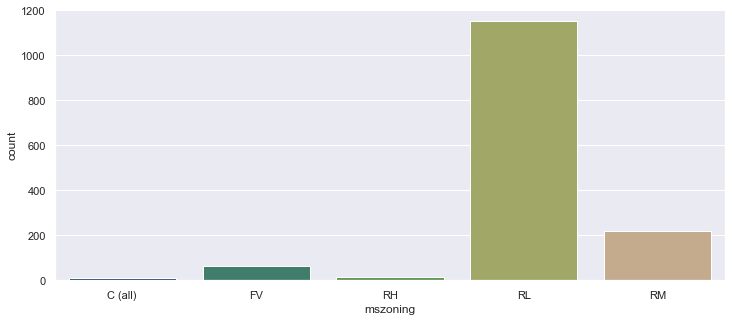

In [40]:
plt.figure(figsize=(12, 5))
sns.set_theme(style='darkgrid')
sns.countplot(data=data_clean.sort_values('mszoning'), x='mszoning', palette='gist_earth');

### La mayoria de las casas se encuentran en una zona residencial de baja densidad

In [41]:
data_clean['street'].describe()

count     1460
unique       2
top       Pave
freq      1454
Name: street, dtype: object

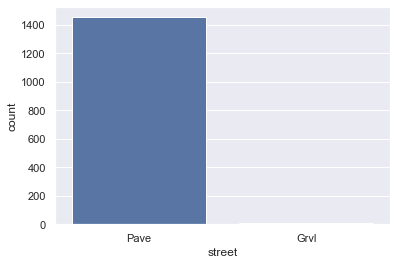

In [42]:
sns.countplot(data=data_clean, x='street')
plt.xticks(rotation=0);

### La mayoria de las propiedades tiene acceso pavimentado

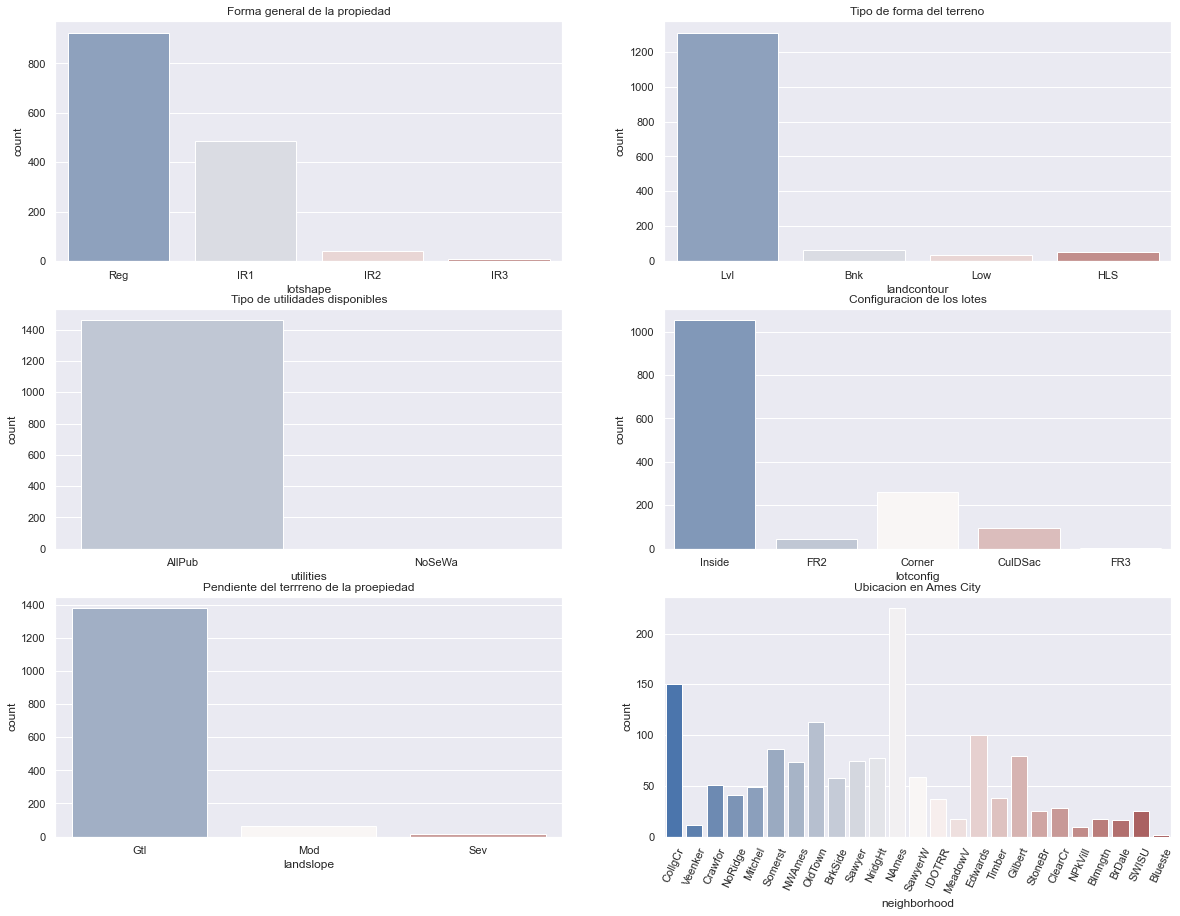

In [43]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))

sns.countplot(data=data_clean, x='lotshape',palette='vlag', ax=ax[0,0])
ax[0,0].set_title('Forma general de la propiedad')

sns.countplot(data=data_clean, x='landcontour',palette='vlag', ax=ax[0,1])
ax[0,1].set_title('Tipo de forma del terreno')

sns.countplot(data=data_clean, x='utilities',palette='vlag', ax=ax[1, 0])
ax[1,0].set_title('Tipo de utilidades disponibles')

sns.countplot(data=data_clean, x='lotconfig',palette='vlag', ax=ax[1, 1])
ax[1,1].set_title('Configuracion de los lotes')

sns.countplot(data=data_clean, x='landslope',palette='vlag', ax=ax[2, 0])
ax[2,0].set_title('Pendiente del terrreno de la proepiedad')

sns.countplot(data=data_clean, x='neighborhood',palette='vlag', ax=ax[2, 1])
ax[2,1].set_title('Ubicacion en Ames City'), plt.xticks(rotation=65);

### La mayoria de las propiedades tienen una forma regular o ligeramente irregular, se encuentran a nivel de piso, presentan todos los tipos de utilidades publicos (gas, luz, agua), la mayoria se encuentra en un lote interior o en la esquina, en un terreno con poca pendiente. La mayoria de las casas se encuentran en North Ames o College creek.

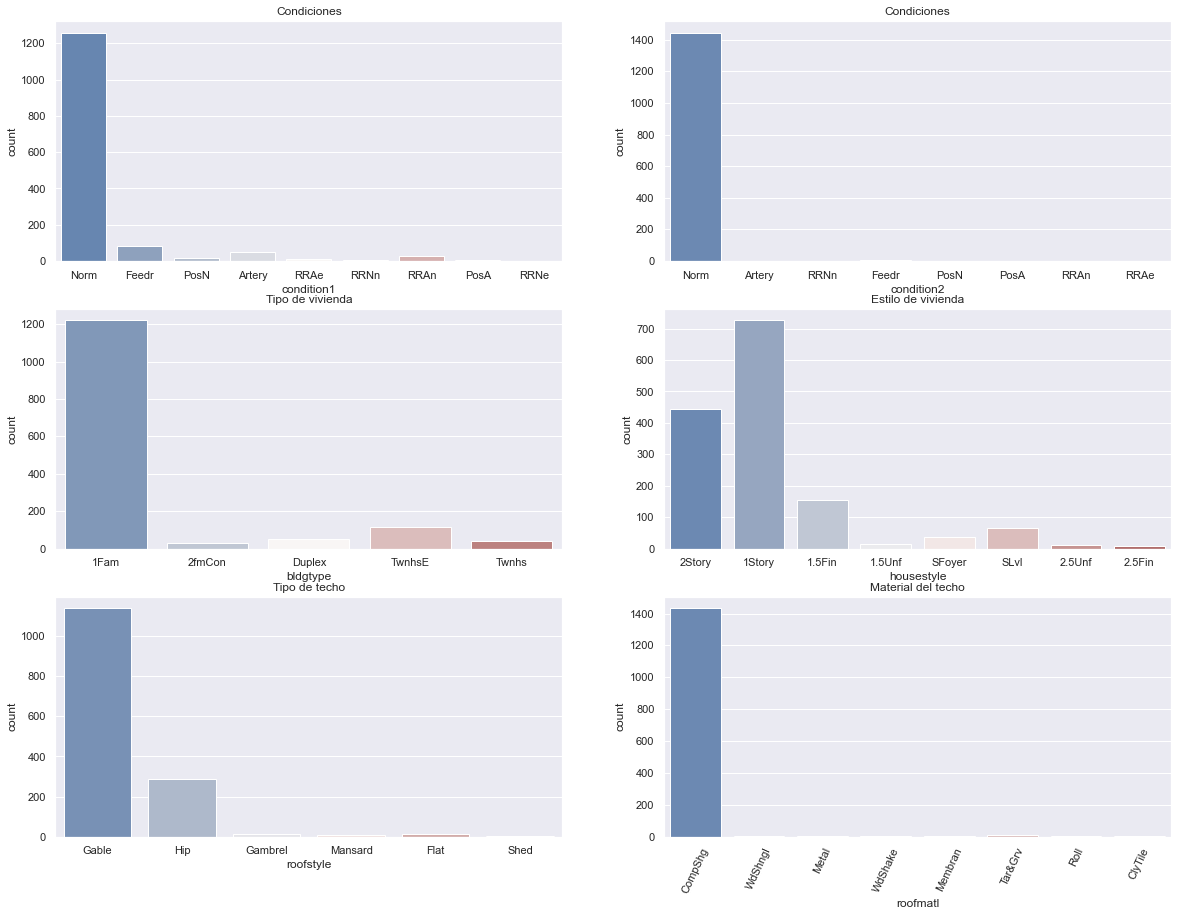

In [44]:
fig, ax = plt.subplots(3, 2, figsize=(20, 15))

sns.countplot(data=data_clean, x='condition1',palette='vlag', ax=ax[0, 0])
ax[0,0].set_title('Condiciones')

sns.countplot(data=data_clean, x='condition2',palette='vlag', ax=ax[0, 1])
ax[0,1].set_title('Condiciones')

sns.countplot(data=data_clean, x='bldgtype',palette='vlag', ax=ax[1, 0])
ax[1,0].set_title('Tipo de vivienda')

sns.countplot(data=data_clean, x='housestyle',palette='vlag', ax=ax[1, 1])
ax[1,1].set_title('Estilo de vivienda')

sns.countplot(data=data_clean, x='roofstyle',palette='vlag', ax=ax[2, 0])
ax[2,0].set_title('Tipo de techo')

sns.countplot(data=data_clean, x='roofmatl',palette='vlag', ax=ax[2, 1])
ax[2,1].set_title('Material del techo'), plt.xticks(rotation=65);

### Las propiedades en su mayoria presentan condiciones normales o se encuentran adyacente a la calle de acceso, la mayoria de la propiedades fueron construidas para una familia o viviendas adosadas que comparten paredes con los vecinos. La mayoria son viviendas de un piso, dos pisos o uno y medio pisos terminados. Techo a dos aguas y cuatro aguas con teja estandar. 

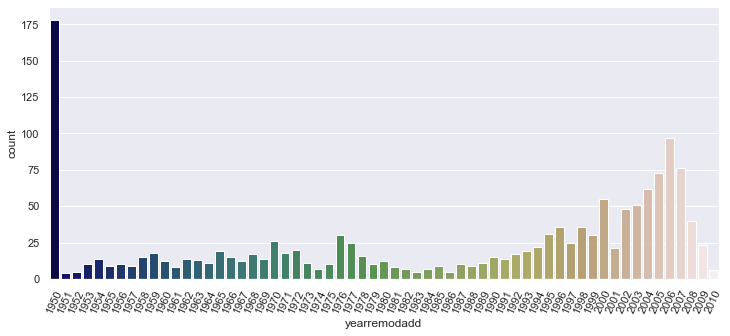

In [45]:
plt.figure(figsize=(12, 5))
sns.set_theme(style='darkgrid')
sns.countplot(data=data_clean.sort_values('yearremodadd'), x='yearremodadd', palette='gist_earth'), plt.xticks(rotation=65);

### Utilice la variable 'yearremodadd' porque presenta el año en el cual se remodelo la casa, pero si no ha sido remodelada se queda con el año de construcción. Se puede observar que aun se presentan viviendas con una constrcción sin remodelación 

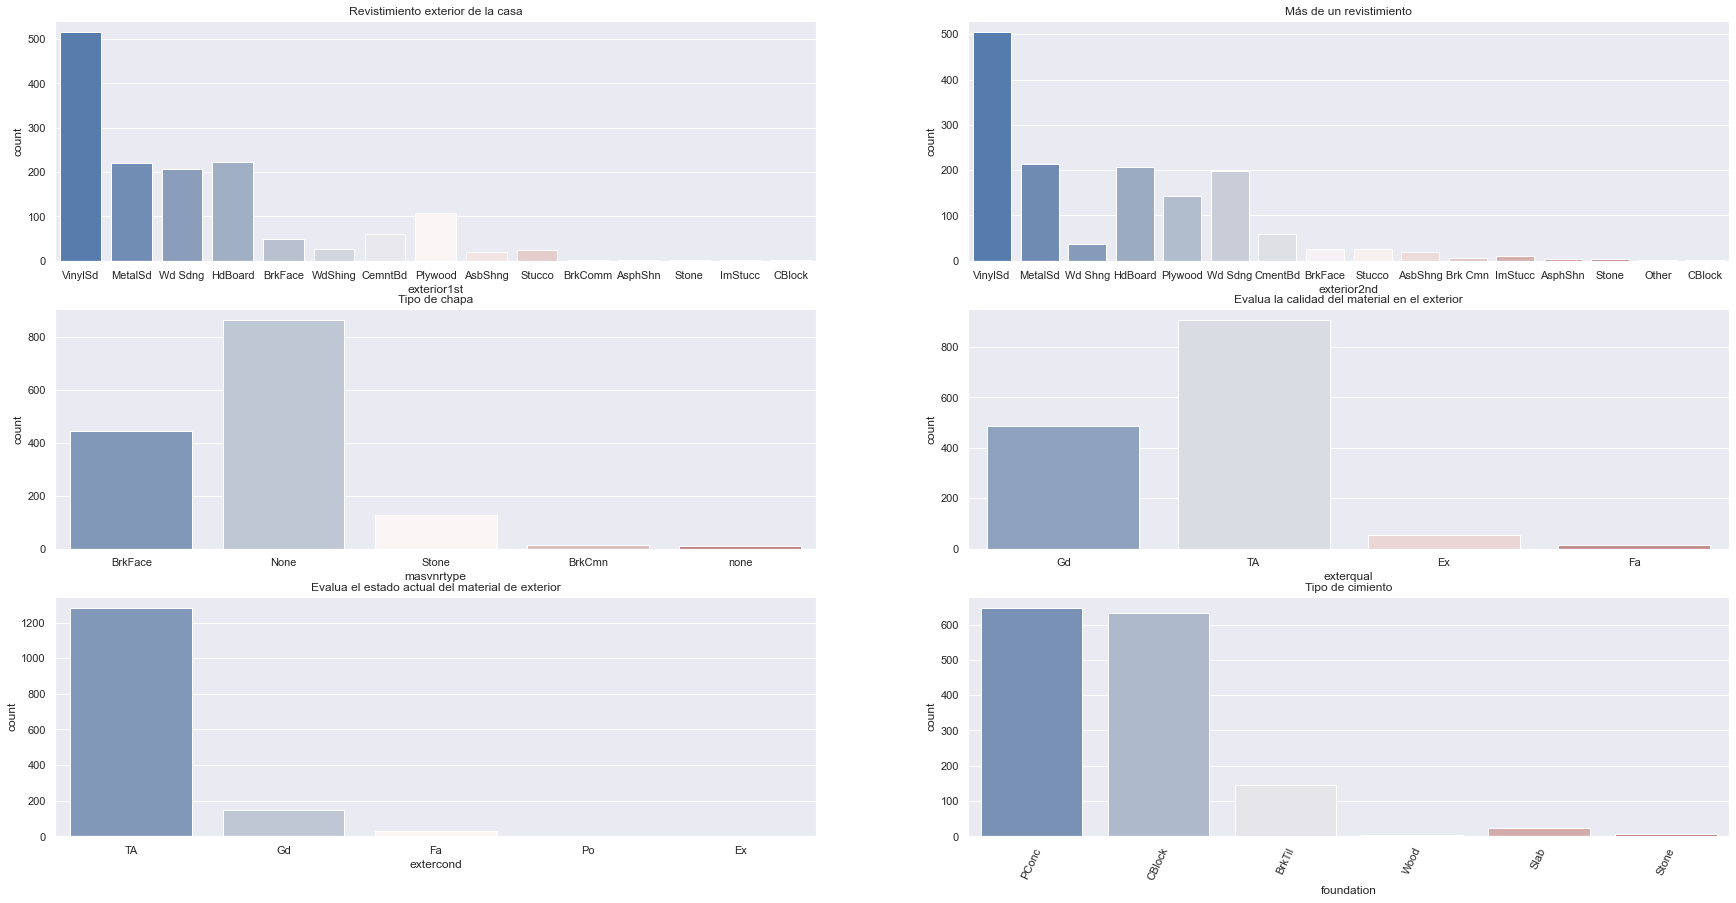

In [46]:
fig, ax = plt.subplots(3, 2, figsize=(30, 15))

sns.countplot(data=data_clean, x='exterior1st',palette='vlag', ax=ax[0, 0])
ax[0,0].set_title('Revistimiento exterior de la casa'), plt.xticks(rotation=65)

sns.countplot(data=data_clean, x='exterior2nd',palette='vlag', ax=ax[0, 1])
ax[0,1].set_title('Más de un revistimiento')

sns.countplot(data=data_clean, x='masvnrtype',palette='vlag', ax=ax[1, 0])
ax[1,0].set_title('Tipo de chapa')

sns.countplot(data=data_clean, x='exterqual',palette='vlag', ax=ax[1, 1])
ax[1,1].set_title('Evalua la calidad del material en el exterior')

sns.countplot(data=data_clean, x='extercond',palette='vlag', ax=ax[2, 0])
ax[2,0].set_title('Evalua el estado actual del material de exterior')

sns.countplot(data=data_clean, x='foundation',palette='vlag', ax=ax[2, 1])
ax[2,1].set_title('Tipo de cimiento'), plt.xticks(rotation=65);



### La mayoria de las propiedades tienen revestimiento de vinil y como segungo material revestimiento de metal, la mayoria no presenta un chapado pero algunas propiedades tienen cara de ladrillo. La mayoria de la calidad del material es promedio y algunas son evaluadas como bien, el estado actual del material exterior es promedio y algunas bien.
### Los cimientos de las propiedades en su mayoria son de concreto, bloques de cemento y algunas de ladrillo/azulejo.

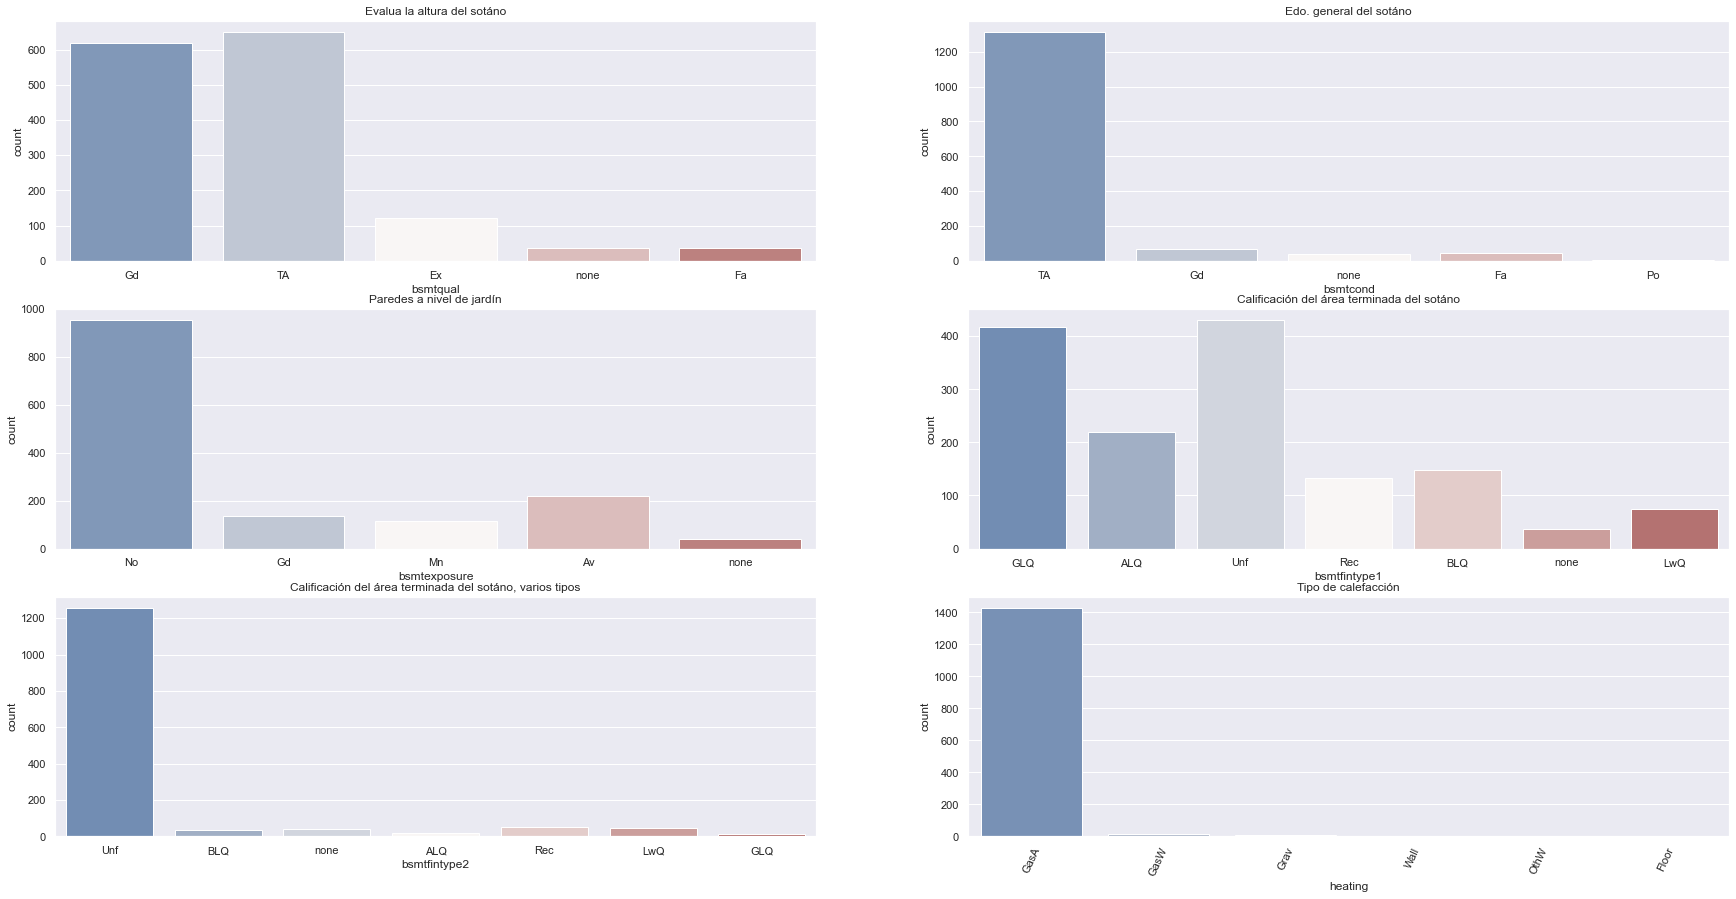

In [47]:
fig, ax = plt.subplots(3, 2, figsize=(30, 15))

sns.countplot(data=data_clean, x='bsmtqual',palette='vlag', ax=ax[0, 0])
ax[0,0].set_title('Evalua la altura del sotáno'), plt.xticks(rotation=65)

sns.countplot(data=data_clean, x='bsmtcond',palette='vlag', ax=ax[0, 1])
ax[0,1].set_title('Edo. general del sotáno')

sns.countplot(data=data_clean, x='bsmtexposure',palette='vlag', ax=ax[1, 0])
ax[1,0].set_title('Paredes a nivel de jardín')

sns.countplot(data=data_clean, x='bsmtfintype1',palette='vlag', ax=ax[1, 1])
ax[1,1].set_title('Calificación del área terminada del sotáno')

sns.countplot(data=data_clean, x='bsmtfintype2',palette='vlag', ax=ax[2, 0])
ax[2,0].set_title('Calificación del área terminada del sotáno, varios tipos')

sns.countplot(data=data_clean, x='heating',palette='vlag', ax=ax[2, 1])
ax[2,1].set_title('Tipo de calefacción'), plt.xticks(rotation=65);

### Las propiedades en general tienen una altura buena(90-99 inches) o promedio(90-99 inches), el edo general del sotano es tipica/leve humedad permitida, la mayoria de las propiedades no presentan las paredes del sotano expuestas al jardin o algunas presentan exposición promedio (los niveles divididos o los vestíbulos suelen tener una puntuación promedio o superior). La mayoria de las propiedades presenta un sotano inconcluso o puede ser una buena vivienda. 
### La mayoria de las propiedades tiene calefaccion de horno de aire caliente forzado a gas.

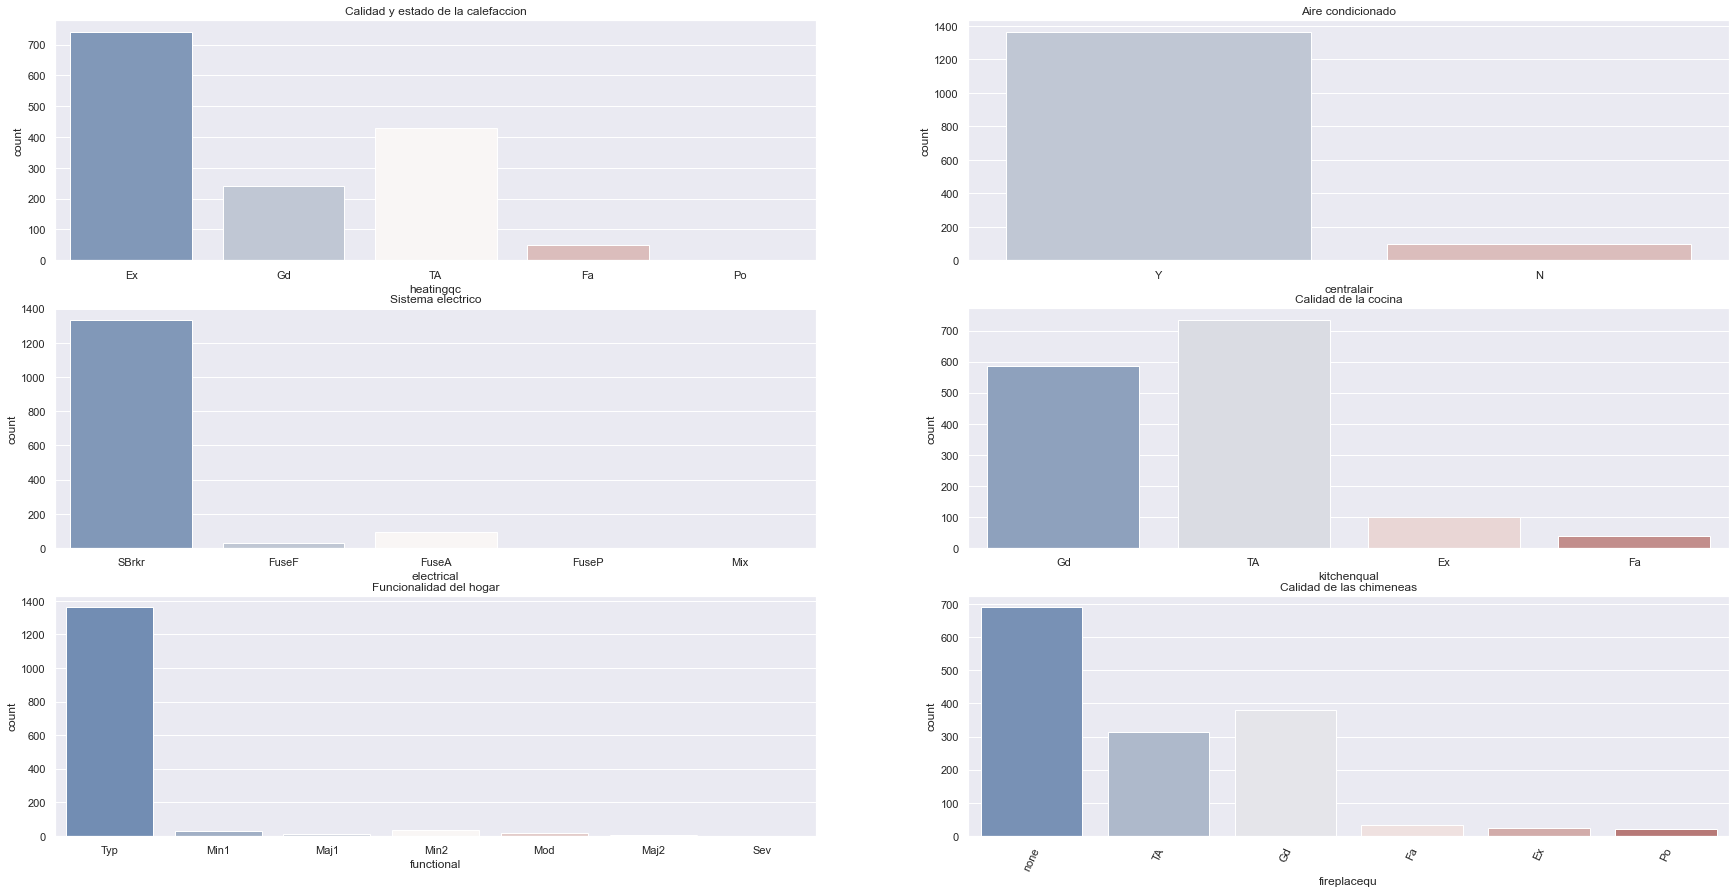

In [48]:
fig, ax = plt.subplots(3, 2, figsize=(30, 15))

sns.countplot(data=data_clean, x='heatingqc',palette='vlag', ax=ax[0, 0])
ax[0,0].set_title('Calidad y estado de la calefaccion'), plt.xticks(rotation=65)

sns.countplot(data=data_clean, x='centralair',palette='vlag', ax=ax[0, 1])
ax[0,1].set_title('Aire condicionado')

sns.countplot(data=data_clean, x='electrical',palette='vlag', ax=ax[1, 0])
ax[1,0].set_title('Sistema electrico')

sns.countplot(data=data_clean, x='kitchenqual',palette='vlag', ax=ax[1, 1])
ax[1,1].set_title('Calidad de la cocina')

sns.countplot(data=data_clean, x='functional',palette='vlag', ax=ax[2, 0])
ax[2,0].set_title('Funcionalidad del hogar')

sns.countplot(data=data_clean, x='fireplacequ',palette='vlag', ax=ax[2, 1])
ax[2,1].set_title('Calidad de las chimeneas'), plt.xticks(rotation=65);

### La mayoria de las propiedades presentan una calefaccion excelente, promedio o buena, la mayoria tienen aire condicionado. el sistema electrico es de disyuntores estándar y Romex, pero algunas presentan caja de fusibles de más de 60 AMP y todo el cableado Romex (promedio). La calidad de la cocina varia entre promedio, buena y excelente. La mayoria de las propiedades estan catalogadas con funcionalidad tipica y la mayoria de las propiedades no tienen chimeneas pero las que tienen se encuentran en buena calidad o promedio. 

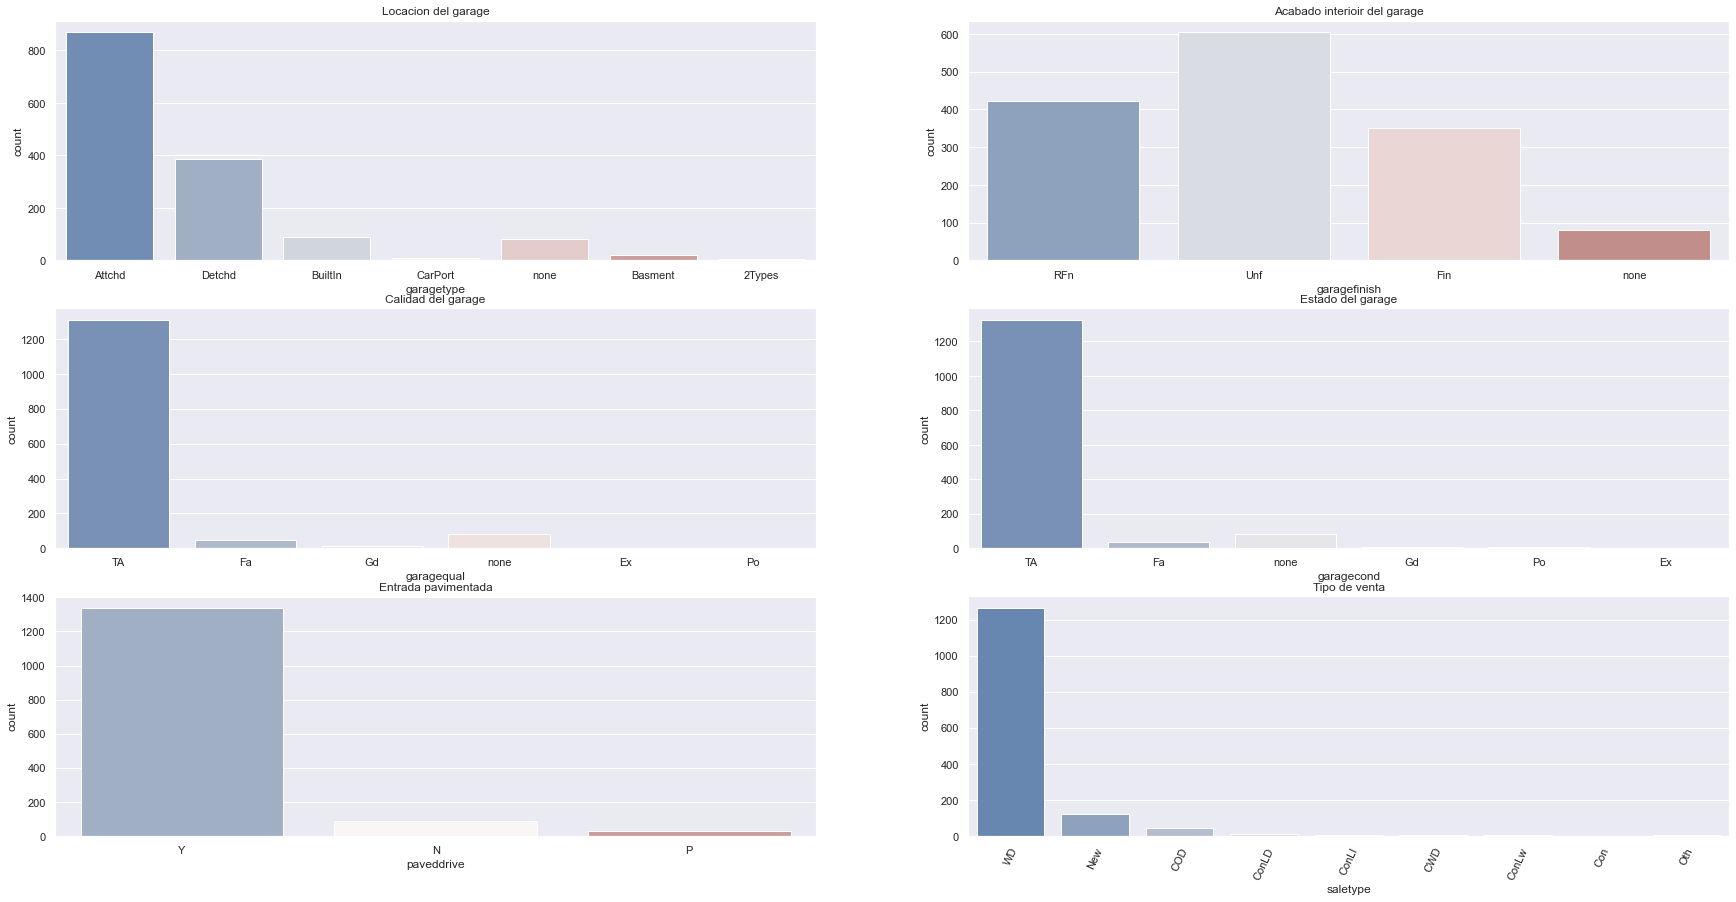

In [49]:
fig, ax = plt.subplots(3, 2, figsize=(30, 15))

sns.countplot(data=data_clean, x='garagetype',palette='vlag', ax=ax[0, 0])
ax[0,0].set_title('Locacion del garage'), plt.xticks(rotation=65)

sns.countplot(data=data_clean, x='garagefinish',palette='vlag', ax=ax[0, 1])
ax[0,1].set_title('Acabado interioir del garage')

sns.countplot(data=data_clean, x='garagequal',palette='vlag', ax=ax[1, 0])
ax[1,0].set_title('Calidad del garage')

sns.countplot(data=data_clean, x='garagecond',palette='vlag', ax=ax[1, 1])
ax[1,1].set_title('Estado del garage')

sns.countplot(data=data_clean, x='paveddrive',palette='vlag', ax=ax[2, 0])
ax[2,0].set_title('Entrada pavimentada')

sns.countplot(data=data_clean, x='saletype',palette='vlag', ax=ax[2, 1])
ax[2,1].set_title('Tipo de venta'), plt.xticks(rotation=65);

### La mayoria de las casas tienen el garage adjunto a la casa, separado de la casa o empotrado (parte del garage de la casa; normalmente tiene un espacio encima del garage), en su mayoria no presentan un acabado interior terminado. En general la calidad y estado del garage es promedio. La mayoria tiene la entrada es pavimentada.
### El tipo de venta para la mayoria de las propiedades es Escritura de Garantía - Convencional o Casa recién construida y vendida.

### Despues de hacer la visualizacion de las variables categoricas para conocer las caracteristicas que presentan las propiedades, realice una correlacion de las variables numericas. 

C:\Users\irvg\AppData\Local\Temp\ipykernel_17588\1801596801.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(matriz, dtype=np.bool)


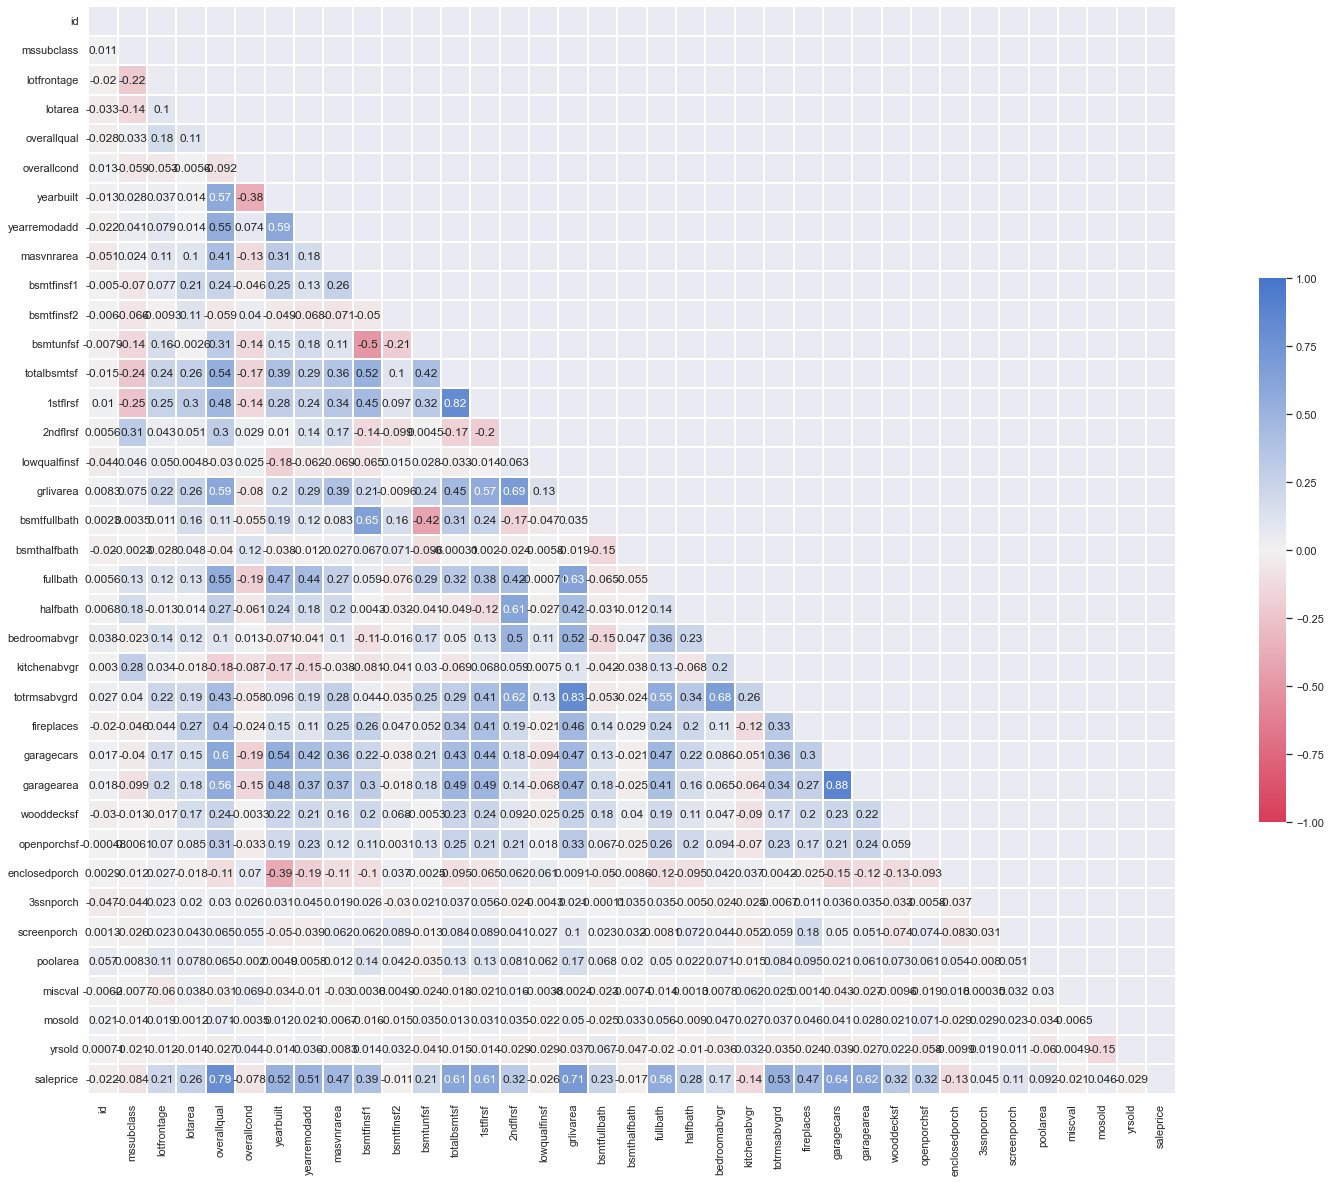

In [50]:
matriz = data_clean.corr()
mask = np.zeros_like(matriz, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(6, 255, as_cmap=True)
plt.figure(figsize = (30,20))
sns.heatmap(matriz, mask = mask, cmap = cmap, vmax = 1, vmin = -1, annot = True, 
            square = True, center = 0, linewidths = 0.2, cbar_kws = {'shrink':0.5});

In [51]:
data_clean.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,57.623288,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,34.664304,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,0.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,42.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,63.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Busque las variables que tenian mayor correlacion, para darme una idea de que podria afectar el precio de una propiedad.
### overallqual= Valora el material general y acabado de la propiedad.
### yearremodadd= año de remodelación, si no fue remodelada se deja el año de construcción.
### totalbsmtsf= area total del sotano en pies cuadrados.
### 1stflrsf= area en pies cuadrados del primer piso.
### 2ndflrsf= area en pies cuadrados del segundo piso
### grlivarea= pies cuadrados de la superficie habitable a nivel del suelo
### fullbath= baños completos
### halfbath= medio baño
### bedroomabvgr= dormitorios a nivel del suelo (no sotano)
### totrmsabvgrd= total de habitaciones a nivel del suelo (no baños)
### fireplaces= numero de chimeneas
### garagecars= tamaño del garage en capacidad

In [52]:
data_clean.groupby('neighborhood').agg({'overallqual':'mean'}).sort_values('overallqual')

,overallqual
neighborhood,
MeadowV,4.470588
IDOTRR,4.756757
Sawyer,5.027027
BrkSide,5.051724
Edwards,5.080000
NAmes,5.360000
OldTown,5.389381
SWISU,5.440000
Mitchel,5.591837


In [53]:
from statsmodels.stats.weightstats import ztest

In [54]:
north_ames = data_clean[data_clean['neighborhood']=='NAmes']['overallqual']


In [55]:
ztest(north_ames, value=6.09)

(-13.29979756930966, 2.3209584300586414e-40)

In [56]:
college_creek = data_clean[data_clean['neighborhood']=='CollgCr']['overallqual']

In [57]:
ztest(college_creek, value=6.09)

(6.489074697788799, 8.636514168393794e-11)

### Realice una prueba z con los dos vecindarios con mayor numero de propiedades que obtuvimos en la visualizacion para conocer si material y acabado general de propiedad es igual a todos los vecindarios o hay diferencia.
### En los dos casos el valor de p<0.05 por lo que se rechaza la hipotesis nula de que todas las propiedades tienen el mismo valor por el material y acabado general de la propiedad.

In [58]:
from scipy.stats import ttest_rel, ttest_1samp

In [59]:
t, p = ttest_rel(data_clean.yearbuilt, data_clean.yearremodadd)

In [60]:
t

-21.227606346649484

In [61]:
p

2.2984366463100835e-87

In [62]:
p <= 0.05

True

### Realice una prueba t para dos muestras y compare las variables de el año de construccion y año de remodelacion.
### El valor de p < 0.05 por lo que si hubo un cambio en el valor de las propiedades debido a la remodelación. 

In [63]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import f_oneway

In [64]:
df_house = data_clean[['saletype', 'yearbuilt']]
df_house

,saletype,yearbuilt
0,WD,2003
1,WD,1976
2,WD,2001
3,WD,1915
4,WD,2000
...,...,...
1455,WD,1999
1456,WD,1978
1457,WD,1941
1458,WD,1950


In [65]:
df_house['saletype_count'] = df_house.groupby('saletype').cumcount()
df_house.head(10)

C:\Users\irvg\AppData\Local\Temp\ipykernel_17588\1335365031.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_house['saletype_count'] = df_house.groupby('saletype').cumcount()


,saletype,yearbuilt,saletype_count
0,WD,2003,0
1,WD,1976,1
2,WD,2001,2
3,WD,1915,3
4,WD,2000,4
5,WD,1993,5
6,WD,2004,6
7,WD,1973,7
8,WD,1931,8
9,WD,1939,9


In [66]:
df_house_pivot = df_house.pivot(index='saletype_count', columns='saletype', values='yearbuilt')
df_house_pivot

saletype,COD,CWD,Con,ConLD,ConLI,ConLw,New,Oth,WD
saletype_count,,,,,,,,,
0,1958.0,1964.0,1993.0,1915.0,1971.0,2007.0,2005.0,1977.0,2003.0
1,1960.0,1999.0,2009.0,2003.0,1963.0,1941.0,2006.0,1991.0,1976.0
2,1920.0,1940.0,NaN,1920.0,2002.0,1996.0,2005.0,1970.0,2001.0
3,1977.0,1916.0,NaN,1900.0,1920.0,1936.0,1920.0,NaN,1915.0
4,1953.0,NaN,NaN,2004.0,2008.0,1916.0,2006.0,NaN,2000.0
...,...,...,...,...,...,...,...,...,...
1262,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.0
1263,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1978.0
1264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1941.0


In [67]:
df_house_pivot1 = df_house_pivot[['COD', 'CWD', 'Con', 'ConLI', 'ConLw', 'New', 'Oth', 'WD']].fillna(0)

In [68]:
df_house_pivot1

saletype,COD,CWD,Con,ConLI,ConLw,New,Oth,WD
saletype_count,,,,,,,,
0,1958.0,1964.0,1993.0,1971.0,2007.0,2005.0,1977.0,2003.0
1,1960.0,1999.0,2009.0,1963.0,1941.0,2006.0,1991.0,1976.0
2,1920.0,1940.0,0.0,2002.0,1996.0,2005.0,1970.0,2001.0
3,1977.0,1916.0,0.0,1920.0,1936.0,1920.0,0.0,1915.0
4,1953.0,0.0,0.0,2008.0,1916.0,2006.0,0.0,2000.0
...,...,...,...,...,...,...,...,...
1262,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1999.0
1263,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1978.0
1264,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1941.0


In [69]:
f_oneway(df_house_pivot1['COD'], df_house_pivot1['CWD'], df_house_pivot1['Con'], 
         df_house_pivot1['ConLI'], df_house_pivot1['ConLw'], df_house_pivot1['New'], 
         df_house_pivot1['Oth'], df_house_pivot1['WD'])

F_onewayResult(statistic=8869.77278244863, pvalue=0.0)

### Realice una prueba ANOVA para saber si habia diferencia significativa entre los tipos de venta y los años de construcción, lo hice con todos los grupos y el valor fue p<0.05, por lo que si son diferentes los grupos. Pero anterioirmente habiamos visto que los registros se agruparon en los primeros tres tipos de venta, por lo que lo vou a limitar a esos.

In [70]:
f_oneway(df_house_pivot1['WD'], df_house_pivot1['New'], df_house_pivot1['COD'])

F_onewayResult(statistic=9004.335477295925, pvalue=0.0)

In [71]:
f_oneway(df_house_pivot1['WD'], df_house_pivot1['New'])

F_onewayResult(statistic=11366.592809379283, pvalue=0.0)

In [72]:
f_oneway(df_house_pivot1['New'], df_house_pivot1['COD'])

F_onewayResult(statistic=42.64307928409285, pvalue=7.911218576090585e-11)

In [73]:
f_oneway(df_house_pivot1['WD'], df_house_pivot1['COD'])

F_onewayResult(statistic=36107.50378813296, pvalue=0.0)

### Me parece que no es la mejor prueba para analizar estos grupos, pero se puede observar que la diferencia significativa esta entre el grupo New (casa construida y vendida) y el grupo COD (Escritura/Patrimonio del oficial de la corte) con una p<0.05

In [74]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1460 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   lotshape       1460 non-null   object 
 7   landcontour    1460 non-null   object 
 8   utilities      1460 non-null   object 
 9   lotconfig      1460 non-null   object 
 10  landslope      1460 non-null   object 
 11  neighborhood   1460 non-null   object 
 12  condition1     1460 non-null   object 
 13  condition2     1460 non-null   object 
 14  bldgtype       1460 non-null   object 
 15  housestyle     1460 non-null   object 
 16  overallqual    1460 non-null   int64  
 17  overallcond    1460 non-null   int64  
 18  yearbuil

In [75]:
data = data_clean.loc[:, ["mssubclass", "lotfrontage", "lotarea", "overallqual",
                     "overallcond", "yearbuilt", "yearremodadd", "masvnrarea",
                     "bsmtfinsf1", "bsmtfinsf2", "bsmtunfsf", "totalbsmtsf",
                     "1stflrsf", "2ndflrsf", "lowqualfinsf", "grlivarea",
                     "bsmtfullbath", "bsmthalfbath", "fullbath", "halfbath",
                     "bedroomabvgr", "kitchenabvgr", "totrmsabvgrd", "fireplaces",
                     "garagecars", "garagearea", "wooddecksf", "openporchsf", 
                     "enclosedporch", "3ssnporch", "screenporch", "poolarea",
                     "miscval", "mosold", "yrsold"]]

In [76]:
data

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,2007
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,2010
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,2010
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,4,2010


In [77]:
from sklearn import metrics
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

In [78]:
y = pd.Series(data_clean.saleprice)

In [79]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: saleprice, dtype: int64

In [80]:
modelo_lin = LinearRegression()

In [81]:
modelo_lin

LinearRegression()

In [82]:
modelo_lin.fit(data, y)

LinearRegression()

In [83]:
b_0 = modelo_lin.intercept_
b_0

571881.6875046118

In [84]:
mat_coef = modelo_lin.coef_
mat_coef

array([-1.66247283e+02,  1.98696872e+01,  4.02631126e-01,  1.73297377e+04,
        4.44989903e+03,  3.20513157e+02,  1.68108255e+02,  3.12098655e+01,
        9.84570424e+00, -1.26873637e+00,  2.98508438e-01,  8.87547631e+00,
        1.64287717e+01,  1.67208399e+01, -1.90765907e+00,  3.12419525e+01,
        9.42255933e+03,  1.91190893e+03,  4.27566897e+03, -1.67235318e+03,
       -1.04338814e+04, -1.27588558e+04,  5.06615316e+03,  3.65018362e+03,
        1.06993108e+04, -1.84822072e+00,  2.62484713e+01, -1.09498768e+00,
        1.10519058e+01,  1.84451766e+01,  5.58061390e+01, -3.55403508e+01,
       -6.12437678e-01, -5.70683246e+01, -7.94635014e+02])

In [85]:
mat_coef.size

35

In [86]:
modelo_lin.score(data, y)

0.8126078220446719

In [87]:
valores = data.iloc[[10,20,40,80,160, 325, 750, 1400]]
valores

,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold
10,20,70.0,11200,5,5,1965,1965,0.0,906,0,134,1040,1040,0,0,1040,1,0,1,0,3,1,5,0,1,384,0,0,0,0,0,0,0,2,2008
20,60,101.0,14215,8,5,2005,2006,380.0,0,0,1158,1158,1158,1218,0,2376,0,0,3,1,4,1,9,1,3,853,240,154,0,0,0,0,0,11,2006
40,20,84.0,8658,6,5,1965,1965,101.0,643,0,445,1088,1324,0,0,1324,0,0,2,0,3,1,6,1,2,440,0,138,0,0,0,0,0,12,2006
80,60,100.0,13000,6,6,1968,1968,576.0,448,0,448,896,1182,960,0,2142,0,0,2,1,4,1,8,1,1,509,0,72,0,0,252,0,0,6,2009
160,20,0.0,11120,6,6,1984,1984,0.0,660,0,572,1232,1232,0,0,1232,0,0,2,0,3,1,6,0,2,516,0,0,0,0,0,0,0,6,2008
325,45,50.0,5000,5,6,1941,1950,0.0,116,0,604,720,803,0,0,803,0,0,1,0,2,1,5,0,2,360,0,0,244,0,0,0,0,12,2007
750,50,55.0,8800,4,7,1910,2004,0.0,0,0,576,576,792,348,0,1140,0,0,1,0,3,1,7,0,0,0,0,160,0,0,0,0,0,6,2010
1400,50,50.0,6000,6,7,1929,1950,0.0,0,0,862,862,950,208,0,1158,0,0,1,0,3,1,5,1,1,208,0,0,112,0,0,0,0,7,2008


In [88]:
modelo_lin.predict(valores)

array([120481.44525446, 294375.77751725, 166718.7264302 , 217820.50821628,
       168833.7092938 , 100567.20141602,  75417.36087122, 116080.93937592])

In [89]:
data_clean.iloc[[10,20,40,80,160, 325, 750, 1400],[76]]

,saleprice
10,129500
20,325300
40,160000
80,193500
160,162500
325,87000
750,96500
1400,120000


In [90]:
X_train, X_test, y_train, y_test = train_test_split(data, y, random_state=42, train_size=0.8)

In [91]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 35), (292, 35), (1168,), (292,))

In [92]:
modelo_lin_split = LinearRegression().fit(X_train, y_train)

In [93]:
modelo_lin_split.score(X_train, y_train)

0.8055791232681007

In [94]:
modelo_lin_split.score(X_test, y_test)

0.8262170556175334

### Se realizo una regresion lineal para predecir el precio de las casas.
### Los scores fueron muy similares en los modelos lineales el original (0.8126078220446719), el train (0.8055791232681007) y el test (0.8262170556175334), entre mas cercano el valor a 1, mejor ajustado esta nuestra regresion. Por lo tanto, es un buen modelo para explicar la relacion entre nuestras variables. 

### Solo por mencionar un ejemplo de nuestra prediccion, la propiedad 750 tiene un precio de 96500 pero nuestro modelo predijo 75417.36087122 

In [95]:
regresion_ridge = Ridge(alpha=1).fit(X_train, y_train)
regresion_ridge_100 = Ridge(alpha=100).fit(X_train, y_train)

In [96]:
regresion_ridge.coef_

array([-1.80148515e+02, -9.71360706e+00,  4.08073803e-01,  1.79818331e+04,
        3.87410870e+03,  3.16427950e+02,  2.12304928e+02,  2.44746012e+01,
        8.93324835e+00, -3.22361406e+00, -1.82089524e-01,  5.52754716e+00,
        1.09998418e+01,  1.28234730e+01,  8.10571348e+00,  3.19290274e+01,
        1.12952914e+04, -1.13719860e+03,  3.79245830e+03, -2.09743627e+03,
       -9.16780113e+03, -9.94414660e+03,  5.12151503e+03,  4.23772445e+03,
        1.16230286e+04, -1.67242789e+00,  2.47232585e+01, -4.28815035e+00,
        9.30162920e+00,  3.71644310e+01,  6.45882258e+01, -3.05245493e+01,
       -6.52411679e-01, -1.66728453e+02, -5.68442123e+02])

In [97]:
regresion_ridge_100.coef_

array([-1.80589515e+02, -1.18719302e+01,  4.15630763e-01,  1.67938958e+04,
        3.58211872e+03,  3.57945317e+02,  2.73972337e+02,  2.48125818e+01,
        1.05880296e+01, -2.23481448e+00, -1.25161886e+00,  7.10159625e+00,
        1.15142934e+01,  1.34395330e+01,  9.08012100e+00,  3.40339474e+01,
        6.76770334e+03, -1.33267596e+03,  1.80703631e+03, -1.43936073e+03,
       -7.09915930e+03, -3.00380650e+03,  3.77950649e+03,  4.19908198e+03,
        6.87166172e+03,  1.35243542e+01,  2.71365308e+01, -3.23479009e+00,
        1.40192860e+01,  3.82871950e+01,  6.87846086e+01, -3.75699823e+01,
       -9.94975288e-01, -1.80975748e+02, -5.27741074e+02])

In [98]:
ridge_score = regresion_ridge.score(X_train, y_train)
ridge_score_100 = regresion_ridge_100.score(X_train, y_train)
ridge_score_test = regresion_ridge.score(X_test, y_test)
ridge_score_test_100 = regresion_ridge_100.score(X_test, y_test)

In [99]:
ridge_score, ridge_score_test

(0.8055783628481319, 0.8262241398649172)

In [100]:
ridge_score_100, ridge_score_test_100

(0.8036887650119553, 0.8267596009755964)

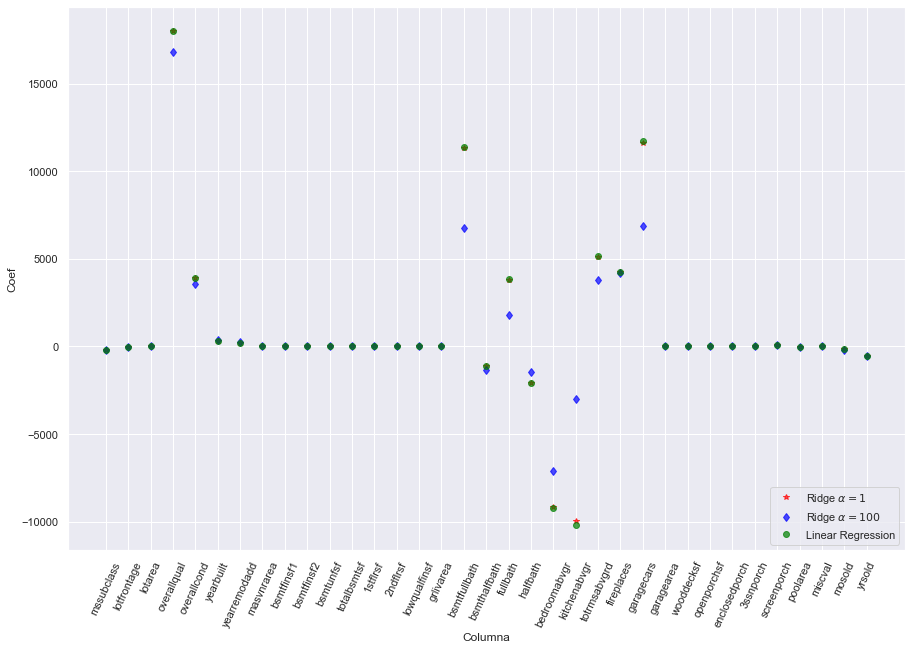

In [101]:
fig = plt.figure(figsize = (15,10))
plt.plot(regresion_ridge.coef_, alpha=0.7, color='red', linestyle='none', marker='*', label = r'Ridge $\alpha = 1$')
plt.plot(regresion_ridge_100.coef_, alpha=0.7, color='blue', linestyle='none', marker='d', label = r'Ridge $\alpha = 100$')
plt.plot(modelo_lin_split.coef_, alpha=0.7, color='green', linestyle='none', marker='o', label = 'Linear Regression')
plt.legend(loc = 4)
plt.xlabel('Columna')
plt.ylabel('Coef')
plt.xticks(range(len(X_train.columns)), X_train.columns, rotation=65)
plt.show()

### Se realizo la regresion Ridge, para observar las variables que podrian ser las mas apreciables para determinar el valor de una propierdad:
#### overallqual: Valora el material general y acabado de la casa
#### overallcond: Califica el edo general de la casa
#### bsmtfullbath: baños completos en el sotano
#### bsmthalfbath: medio baño en el sotano
#### fullbath: baños completos
#### halfbath: medio baño
#### bedroomabvgr: dormitorios sobre nivel del suelo
#### kitchenabvgr: cocina a nivel del suelo
#### totrmsabvgrd: total de habitaciones a nivel del suelo (no baños)
#### fireplaces: numero de chimeneas
#### garagecars: tamaño del garage en capacidad

In [102]:
data_clean['neighborhood'].unique()

array(['CollgCr', 'Veenker', 'Crawfor', 'NoRidge', 'Mitchel', 'Somerst',
       'NWAmes', 'OldTown', 'BrkSide', 'Sawyer', 'NridgHt', 'NAmes',
       'SawyerW', 'IDOTRR', 'MeadowV', 'Edwards', 'Timber', 'Gilbert',
       'StoneBr', 'ClearCr', 'NPkVill', 'Blmngtn', 'BrDale', 'SWISU',
       'Blueste'], dtype=object)

In [103]:
from sklearn.preprocessing import StandardScaler

In [104]:
features = [col for col in data if col != 'overallcond']

In [105]:
X = data[features]
y = data['overallcond']

In [106]:
X.head()

,mssubclass,lotfrontage,lotarea,overallqual,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold
0,60,65.0,8450,7,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008


In [107]:
scaler = StandardScaler()

In [108]:
X.describe()

,mssubclass,lotfrontage,lotarea,overallqual,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,57.623288,10516.828082,6.099315,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753
std,42.300571,34.664304,9981.264932,1.382997,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095
min,20.000000,0.000000,1300.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,42.000000,7553.500000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000
50%,50.000000,63.000000,9478.500000,6.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,79.000000,11601.500000,7.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,313.000000,215245.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000


In [109]:
scaler.fit(X)

StandardScaler()

In [110]:
scaler.mean_, scaler.var_

(array([5.68972603e+01, 5.76232877e+01, 1.05168281e+04, 6.09931507e+00,
        1.97126781e+03, 1.98486575e+03, 1.03117123e+02, 4.43639726e+02,
        4.65493151e+01, 5.67240411e+02, 1.05742945e+03, 1.16262671e+03,
        3.46992466e+02, 5.84452055e+00, 1.51546370e+03, 4.25342466e-01,
        5.75342466e-02, 1.56506849e+00, 3.82876712e-01, 2.86643836e+00,
        1.04657534e+00, 6.51780822e+00, 6.13013699e-01, 1.76712329e+00,
        4.72980137e+02, 9.42445205e+01, 4.66602740e+01, 2.19541096e+01,
        3.40958904e+00, 1.50609589e+01, 2.75890411e+00, 4.34890411e+01,
        6.32191781e+00, 2.00781575e+03]),
 array([1.78811273e+03, 1.20079096e+03, 9.95574129e+07, 1.91136939e+00,
        9.11590608e+02, 4.25940882e+02, 3.26414568e+04, 2.07882985e+05,
        2.60060832e+04, 1.95112676e+05, 1.92330538e+05, 1.49347716e+05,
        1.90426557e+05, 2.36258473e+03, 2.75940503e+05, 2.69083787e-01,
        5.69637831e-02, 3.03300338e-01, 2.52720492e-01, 6.65038000e-01,
        4.85156690e-02

In [111]:
pd.DataFrame(scaler.transform(X), columns=X.columns)

,mssubclass,lotfrontage,lotarea,overallqual,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold
0,0.073375,0.212877,-0.207142,0.651479,1.050994,0.878668,0.514104,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,-0.872563,0.645747,-0.091886,-0.071836,0.156734,-0.429577,-0.570750,1.171992,-0.288653,-0.641228,0.466465,0.257140,-0.795163,-0.120242,-0.482512,-0.819964,3.948809,0.789741,-0.761621,0.163779,-0.211454,-0.318683,0.600495,0.311725,-0.060731,1.626195,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-0.489110,-0.614439
2,0.073375,0.299451,0.073480,0.651479,0.984752,0.830215,0.325915,0.092907,-0.288653,-0.301643,-0.313369,-0.627826,1.189351,-0.120242,0.515013,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,-0.318683,0.600495,0.311725,0.631726,-0.752176,-0.070361,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.990891,0.138777
3,0.309859,0.068587,-0.096897,0.651479,-1.863632,-0.720298,-0.570750,-0.499274,-0.288653,-0.061670,-0.687324,-0.521734,0.937276,-0.120242,0.383659,1.107810,-0.241061,-1.026041,-0.761621,0.163779,-0.211454,0.296763,0.600495,1.650307,0.790804,-0.752176,-0.176048,4.092524,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,-1.367655
4,0.073375,0.761179,0.375148,1.374795,0.951632,0.733308,1.366489,0.463568,-0.288653,-0.174865,0.199680,-0.045611,1.617877,-0.120242,1.299326,1.107810,-0.241061,0.789741,1.227585,1.390023,-0.211454,1.527656,0.600495,1.650307,1.698485,0.780197,0.563760,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,2.100892,0.138777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.073375,0.126303,-0.260560,-0.071836,0.918511,0.733308,-0.570750,-0.973018,-0.288653,0.873321,-0.238122,-0.542435,0.795198,-0.120242,0.250402,-0.819964,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.296763,0.600495,0.311725,-0.060731,-0.752176,-0.100558,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,0.620891,-0.614439
1456,-0.872563,0.790037,0.266407,-0.071836,0.222975,0.151865,0.087911,0.759659,0.722112,0.049262,1.104925,2.355701,-0.795163,-0.120242,1.061367,1.107810,-0.241061,0.789741,-0.761621,0.163779,-0.211454,0.296763,2.152216,0.311725,0.126420,2.033231,-0.704483,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,1.645210
1457,0.309859,0.241735,-0.147810,0.651479,-1.002492,1.024029,-0.570750,-0.369871,-0.288653,0.701265,0.215641,0.065656,1.844744,-0.120242,1.569647,-0.819964,-0.241061,0.789741,-0.761621,1.390023,-0.211454,1.527656,2.152216,-1.026858,-1.033914,-0.752176,0.201405,-0.359325,-0.116339,-0.270208,-0.068692,4.953112,-0.489110,1.645210
1458,-0.872563,0.299451,-0.080160,-0.795151,-0.704406,0.539493,-0.570750,-0.865548,6.092188,-1.284176,0.046905,-0.218982,-0.795163,-0.120242,-0.832788,1.107810,-0.241061,-1.026041,-0.761621,-1.062465,-0.211454,-0.934130,-0.951226,-1.026858,-1.090059,2.168910,-0.704483,1.473789,-0.116339,-0.270208,-0.068692,-0.087688,-0.859110,1.645210


In [112]:
pd.DataFrame(scaler.transform(X), columns=X.columns).describe()

,mssubclass,lotfrontage,lotarea,overallqual,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,bsmtfinsf2,bsmtunfsf,totalbsmtsf,1stflrsf,2ndflrsf,lowqualfinsf,grlivarea,bsmtfullbath,bsmthalfbath,fullbath,halfbath,bedroomabvgr,kitchenabvgr,totrmsabvgrd,fireplaces,garagecars,garagearea,wooddecksf,openporchsf,enclosedporch,3ssnporch,screenporch,poolarea,miscval,mosold,yrsold
count,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03,1.460000e+03
mean,-1.504124e-16,1.028857e-16,-4.202783e-17,-7.680310e-17,1.032983e-15,4.518912e-15,-3.939010e-17,1.505645e-17,1.653168e-16,-7.376139e-17,2.063038e-16,7.686013e-17,-3.269835e-17,1.920268e-16,-1.446332e-16,4.106304e-17,9.999611e-18,2.770995e-16,-3.011290e-17,-1.108892e-16,2.237936e-16,4.387662e-17,2.701036e-16,2.585451e-17,-2.022735e-17,2.190029e-16,3.357284e-17,1.379034e-16,-4.005738e-16,1.199193e-16,-7.945889e-16,2.409602e-16,-6.395189e-17,3.566101e-14
std,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00,1.000343e+00
min,-8.725628e-01,-1.662893e+00,-9.237292e-01,-3.688413e+00,-3.287824e+00,-1.689368e+00,-5.707501e-01,-9.730182e-01,-2.886528e-01,-1.284176e+00,-2.411167e+00,-2.144172e+00,-7.951632e-01,-1.202417e-01,-2.249120e+00,-8.199644e-01,-2.410610e-01,-2.841822e+00,-7.616207e-01,-3.514952e+00,-4.751486e+00,-2.780469e+00,-9.512265e-01,-2.365440e+00,-2.212963e+00,-7.521758e-01,-7.044833e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-1.969111e+00,-1.367655e+00
25%,-8.725628e-01,-4.508569e-01,-2.969908e-01,-7.951515e-01,-5.719226e-01,-8.656586e-01,-5.707501e-01,-9.730182e-01,-2.886528e-01,-7.793259e-01,-5.966855e-01,-7.261556e-01,-7.951632e-01,-1.202417e-01,-7.347485e-01,-8.199644e-01,-2.410610e-01,-1.026041e+00,-7.616207e-01,-1.062465e+00,-2.114536e-01,-9.341298e-01,-9.512265e-01,-1.026858e+00,-6.479160e-01,-7.521758e-01,-7.044833e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-4.891101e-01,-6.144386e-01
50%,-1.631095e-01,1.551612e-01,-1.040633e-01,-7.183611e-02,5.737148e-02,4.425864e-01,-5.707501e-01,-1.319022e-01,-2.886528e-01,-2.031633e-01,-1.503334e-01,-1.956933e-01,-7.951632e-01,-1.202417e-01,-9.797004e-02,-8.199644e-01,-2.410610e-01,7.897405e-01,-7.616207e-01,1.637791e-01,-2.114536e-01,-3.186833e-01,6.004949e-01,3.117246e-01,3.284429e-02,-7.521758e-01,-3.270298e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,-1.191097e-01,1.387775e-01
75%,3.098594e-01,6.168893e-01,1.087080e-01,6.514792e-01,9.516316e-01,9.271216e-01,3.383686e-01,5.891327e-01,-2.886528e-01,5.450557e-01,5.491227e-01,5.915905e-01,8.731117e-01,-1.202417e-01,4.974036e-01,1.107810e+00,-2.410610e-01,7.897405e-01,1.227585e+00,1.637791e-01,-2.114536e-01,2.967633e-01,6.004949e-01,3.117246e-01,4.820057e-01,5.886506e-01,3.221901e-01,-3.593249e-01,-1.163393e-01,-2.702084e-01,-6.869175e-02,-8.768781e-02,6.208910e-01,8.919936e-01
max,3.147673e+00,7.369662e+00,2.051827e+01,2.821425e+00,1.282839e+00,1.217843e+00,8.285201e+00,1.140575e+01,8.851638e+00,4.004295e+00,1.152095e+01,9.132681e+00,3.936963e+00,1.164775e+01,7.855574e+00,4.963359e+00,8.138680e+00,2.605522e+00,3.216791e+00,6.294997e+00,8.868612e+00,4.604889e+00,3.703938e+00,2.988889e+00,4.421526e+00,6.087635e+00,7.554198e+00,8.675309e+00,1.721723e+01,8.341462e+

In [113]:
X_standard = pd.DataFrame(scaler.transform(X), columns=X.columns)

In [114]:
from sklearn.decomposition import PCA

In [115]:
pca = PCA()

In [116]:
pca.fit(X_standard)

PCA()

In [117]:
pca.components_

array([[-1.50545353e-02,  1.04078165e-01,  1.14849239e-01, ...,
        -1.06039193e-02,  2.46294612e-02, -1.51482056e-02],
       [ 1.87229682e-01, -2.48957263e-03, -6.79493995e-02, ...,
         2.26008354e-02,  2.63501680e-02, -3.58274196e-02],
       [-1.75627045e-01,  1.64979772e-01,  2.82150366e-01, ...,
         4.98050896e-02, -1.09222472e-02, -8.25423322e-03],
       ...,
       [-2.87634661e-02,  1.00682708e-02, -5.44404518e-03, ...,
         1.46038943e-02, -6.80975550e-03,  9.47391348e-03],
       [-2.11622757e-16,  3.06505328e-17, -6.93257162e-17, ...,
         7.13439122e-17, -8.08481785e-17,  1.60464590e-16],
       [-0.00000000e+00, -1.35323988e-16,  7.80376962e-17, ...,
        -9.17659741e-17, -2.66234369e-16,  2.73119929e-16]])

In [118]:
pca.n_components_

34

In [119]:
pca.explained_variance_

array([6.67456659e+00, 3.15667664e+00, 2.14286006e+00, 2.04213439e+00,
       1.38007249e+00, 1.17981359e+00, 1.14536832e+00, 1.10495038e+00,
       1.08697724e+00, 1.03184447e+00, 1.02777245e+00, 1.01478976e+00,
       9.81498556e-01, 9.58964159e-01, 8.94830713e-01, 8.70979807e-01,
       8.46219964e-01, 7.91489338e-01, 7.35610387e-01, 7.21307627e-01,
       6.62782354e-01, 6.21074013e-01, 5.72952510e-01, 4.57957015e-01,
       3.86700767e-01, 3.80289171e-01, 2.88381385e-01, 2.61319222e-01,
       2.00030250e-01, 1.69547975e-01, 1.33238021e-01, 1.00304025e-01,
       1.31632616e-30, 9.00341992e-32])

In [120]:
pca.explained_variance_ratio_

array([1.96176323e-01, 9.27798392e-02, 6.29821278e-02, 6.00216372e-02,
       4.05625656e-02, 3.46766322e-02, 3.36642300e-02, 3.24762813e-02,
       3.19480215e-02, 3.03275803e-02, 3.02078970e-02, 2.98263148e-02,
       2.88478323e-02, 2.81855098e-02, 2.63005240e-02, 2.55995072e-02,
       2.48717753e-02, 2.32631536e-02, 2.16207807e-02, 2.12003994e-02,
       1.94802469e-02, 1.82543712e-02, 1.68400023e-02, 1.34600984e-02,
       1.13657619e-02, 1.11773147e-02, 8.47599599e-03, 7.68059519e-03,
       5.87921303e-03, 4.98328961e-03, 3.91608123e-03, 2.94809776e-03,
       3.86889579e-32, 2.64625094e-33])

In [121]:
sum(pca.explained_variance_ratio_)

0.9999999999999999

In [122]:
pca_17 = PCA(n_components=17)
pca_17.fit(X_standard)

PCA(n_components=17)

In [123]:
pca_17.explained_variance_ratio_

array([0.19617632, 0.09277984, 0.06298213, 0.06002164, 0.04056256,
       0.03467661, 0.03366418, 0.03247622, 0.03194802, 0.03032751,
       0.03020776, 0.029826  , 0.02884755, 0.02818543, 0.0262995 ,
       0.02559929, 0.02486947])

In [124]:
sum(pca_17.explained_variance_ratio_)

0.8094500343393107

In [125]:
data_pca_17 = pd.DataFrame(pca_17.transform(X_standard))

In [126]:
data_pca_17

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,1.273823,0.606246,-1.290101,-1.866901,0.636426,-1.507580,0.394252,-0.125390,-0.679230,0.553421,-0.316953,-0.046860,0.962807,-0.165123,-0.383349,-0.164416,1.157602
1,0.159352,-1.308452,0.714232,0.250257,-0.876806,1.944519,-1.448878,-2.118503,-0.695555,0.931282,0.687201,-1.876495,0.882864,-0.612130,-0.550633,-1.131435,-0.002128
2,1.479407,0.435634,-1.242364,-1.318912,-0.194446,-0.047297,0.704794,0.086487,-0.489685,-0.200896,-0.594972,0.704819,0.214390,0.136863,-0.098952,-0.244342,-0.469351
3,-0.439778,1.038750,1.578909,-0.149584,-0.051771,-1.494247,1.792097,-0.699990,-1.010032,-2.401319,1.604477,-0.439256,-0.308187,2.809893,-0.900830,0.344077,0.977295
4,4.320275,1.050797,-0.510626,-1.322670,-0.130916,0.594872,0.578955,-0.458224,-0.817490,-0.786547,-1.140841,0.938535,0.342712,-0.094931,-0.604312,-0.368060,-1.183538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.688315,1.644874,-1.578618,0.503034,-0.697615,0.266081,0.356676,0.034290,0.173374,-0.167663,-0.224505,0.455755,0.248965,-0.017230,0.251163,0.316338,-0.034711
1456,2.428874,-2.114230,1.909684,0.233598,0.709825,-1.633914,-2.052859,-0.604188,0.448476,0.003576,0.037386,-0.308253,-0.686553,-0.648419,0.423692,0.171443,-0.722681
1457,1.291336,2.761524,1.109626,0.194383,0.161282,-0.853602,-1.801606,1.341620,1.120224,0.965140,2.963030,2.962535,0.501563,-0.409897,-0.216626,-2.045680,-0.427808
1458,-2.596308,-2.214355,1.764095,-0.909916,-0.533261,-2.081699,-2.607102,-1.678654,3.062122,-0.346082,-2.178369,-0.003045,0.713470,3.065403,0.275162,0.002305,-0.669394


In [127]:
data_pca_17['overallcond'] = y

In [128]:
data_pca_17.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,overallcond
0,1.273823,0.606246,-1.290101,-1.866901,0.636426,-1.507580,0.394252,-0.125390,-0.679230,0.553421,-0.316953,-0.046860,0.962807,-0.165123,-0.383349,-0.164416,1.157602,5
1,0.159352,-1.308452,0.714232,0.250257,-0.876806,1.944519,-1.448878,-2.118503,-0.695555,0.931282,0.687201,-1.876495,0.882864,-0.612130,-0.550633,-1.131435,-0.002128,8
2,1.479407,0.435634,-1.242364,-1.318912,-0.194446,-0.047297,0.704794,0.086487,-0.489685,-0.200896,-0.594972,0.704819,0.214390,0.136863,-0.098952,-0.244342,-0.469351,5
3,-0.439778,1.038750,1.578909,-0.149584,-0.051771,-1.494247,1.792097,-0.699990,-1.010032,-2.401319,1.604477,-0.439256,-0.308187,2.809893,-0.900830,0.344077,0.977295,5
4,4.320275,1.050797,-0.510626,-1.322670,-0.130916,0.594872,0.578955,-0.458224,-0.817490,-0.786547,-1.140841,0.938535,0.342712,-0.094931,-0.604312,-0.368060,-1.183538,5


In [129]:
#sns.pairplot(data_pca_17, hue='overallcond');  

### Al final, realice un analisis de componentes principales para conocer el numero de variables que pueden explicar de la misma manera la prediccion del precio de una propiedad, en este caso salio que con 18 variables explique el 80% de los datos. 
### Estas pruebas solo se realizaron con variables numericas, seria importante hacer una transformacion de las variables categoricas para observar si disminuye el numero de variables. 

Text(0, 0.5, 'Var acumulada explicada')

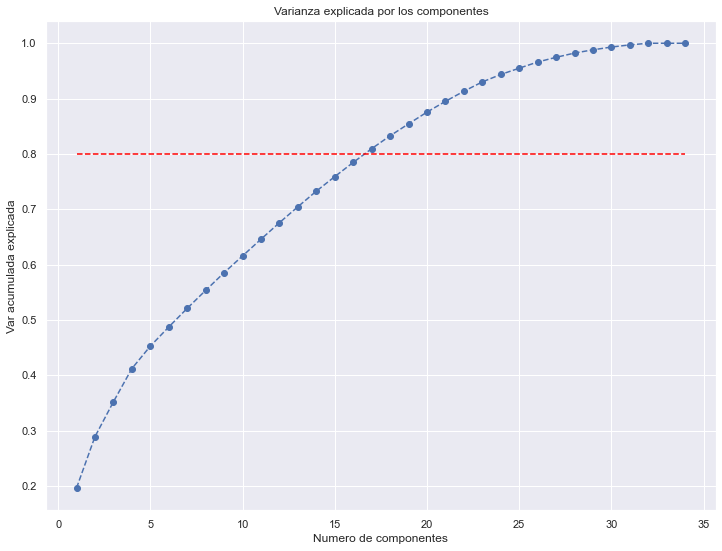

In [130]:
plt.figure(figsize = (12,9))
plt.plot(range(1,pca.n_components_+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.hlines(y = .8, xmin = 1, xmax = pca.n_components_, colors = 'red', linestyles='--')
plt.title('Varianza explicada por los componentes')
plt.xlabel('Numero de componentes')
plt.ylabel('Var acumulada explicada')

#### Con la correlacion seleccione 12 variables que presentaban valores > a 0.50, pero necesitaria 5 variables mas para explicar el 80% 